In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data = pd.read_csv("init_cleaned_data_2_25.csv")
data = data.drop(columns=data.columns[0])

In [10]:
data

,Progress,Duration (in seconds),Finished,Q1,Q2,Q4,Unnamed: 22,Q8,Q10,Q11,...,Q7_High school graduate / GED,Q7_Less than High School,Q7_Professional degree,Q7_Some college,Q9_Independent,Q9_Other third party,Q9_Republican,Q12_Kamala Harris,Q12_Other,Q20
0,100,104,True,5.0,2.0,0.0,NaN,1.0,0.0,3.0,...,0,0,0,0,0,0,0,1,0,4.0
1,100,103,True,15.0,2.0,0.0,NaN,1.0,4.0,1.0,...,0,0,0,0,0,0,0,1,0,4.0
2,100,99,True,9.0,3.0,0.0,NaN,3.0,2.0,3.0,...,0,0,1,0,1,0,0,0,1,4.0
3,100,103,True,1.0,0.0,0.0,NaN,3.0,3.0,3.0,...,0,0,0,1,1,0,0,1,0,1.0
4,100,120,True,3.0,0.0,0.0,NaN,0.0,2.0,3.0,...,0,0,0,1,0,0,0,1,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,100,63,True,5.0,4.0,1.0,NaN,3.0,2.0,1.0,...,0,0,0,1,0,0,1,0,0,3.0
554,100,76,True,5.0,2.0,1.0,NaN,3.0,2.0,3.0,...,0,0,1,0,1,0,0,0,1,4.0
555,100,91,True,5.0,2.0,1.0,Russian Orthodox,3.0,1.0,3.0,...,0,0,1,0,0,0,1,1,0,3.0
556,100,67,True,5.0,0.0,0.0,NaN,1.0,1.0,2.0,...,0,0,0,1,0,0,1,0,0,3.0


In [11]:
numeric_data = data.select_dtypes(include=['number'])

In [15]:
correlation_with_q20 = numeric_data.corr()['Q20'].dropna().sort_values(ascending=False)

top_positive = correlation_with_q20[1:6]
top_negative = correlation_with_q20[-5:]

print("Top Positive Correlations with Q20:")
print(top_positive)

print("\nTop Negative Correlations with Q20:")
print(top_negative)

Top Positive Correlations with Q20:
Q19                  0.259464
Q14                  0.226525
Q11                  0.153991
Q16                  0.140133
Q12_Kamala Harris    0.102043
Name: Q20, dtype: float64

Top Negative Correlations with Q20:
Q10              -0.058228
Q9_Republican    -0.074223
Q6_Catholic      -0.078199
Q9_Independent   -0.085901
Q5_White         -0.090231
Name: Q20, dtype: float64


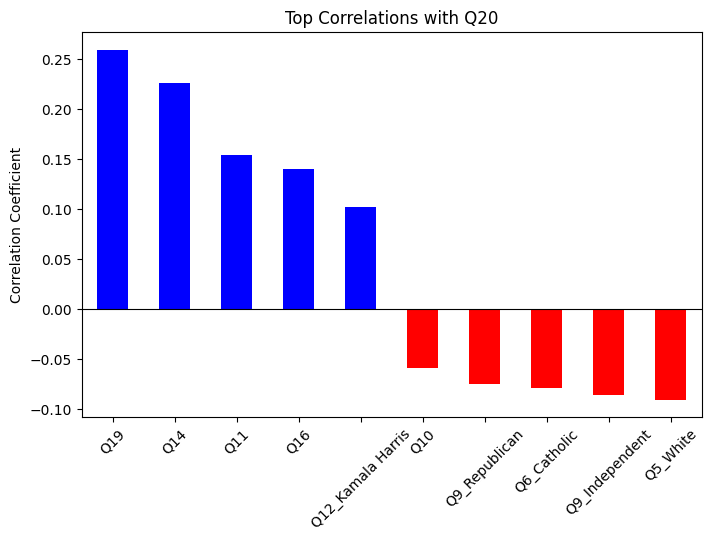

In [16]:
top_corr = pd.concat([top_positive, top_negative])

plt.figure(figsize=(8, 5))
top_corr.plot(kind='bar', color=['blue' if x > 0 else 'red' for x in top_corr])
plt.axhline(0, color='black', linewidth=0.8)
plt.title("Top Correlations with Q20")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=45)
plt.show()

In [18]:
spearman_corr = numeric_data.corr(method='spearman')['Q20'].dropna().sort_values(ascending=False)

print("Top Spearman Correlations with Q20:")
print(spearman_corr[1:6])
print("Top Negative Spearman Correlations with Q20:")
print(spearman_corr[-5:])

Top Spearman Correlations with Q20:
Q19                  0.263598
Q14                  0.212499
Q16                  0.135735
Q11                  0.118013
Q12_Kamala Harris    0.101524
Name: Q20, dtype: float64
Top Negative Spearman Correlations with Q20:
Q3_Male          -0.046208
Q5_White         -0.066352
Q6_Catholic      -0.079684
Q9_Independent   -0.083291
Q9_Republican    -0.087861
Name: Q20, dtype: float64
